<a href="https://colab.research.google.com/github/Ganeshprasannamax/Task_5_6_7/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [75]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [76]:
print(df.shape)
df.head()

(15, 2)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [77]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [78]:
df.drop_duplicates()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [79]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [80]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [82]:
df_data = df['Ground Temperature'].quantile(0.75) - df['Ground Temperature'].quantile(0.25)
upper_threshold = df['Ground Temperature'].quantile(0.75) + (1.5*df_data)
lower_threshold = df['Ground Temperature'].quantile(0.25) - (1.5*df_data)
if upper_threshold > df['Ground Temperature'].max():
  print("No outliers in upper threshold range")
else :
  print("outliers in upper threshold range")
if lower_threshold < df['Ground Temperature'].min() :
  print("No outliers in lower threshold range")
else :
  print("Outliers in lower threshold range")

No outliers in upper threshold range
No outliers in lower threshold range


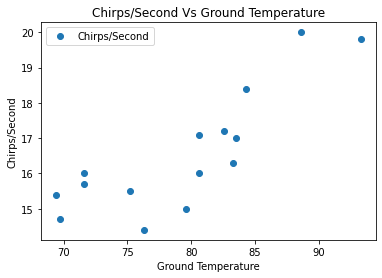

In [13]:
df.plot(y='Chirps/Second',x='Ground Temperature',style ="o")
plt.ylabel('Chirps/Second')
plt.xlabel('Ground Temperature')
plt.title('Chirps/Second Vs Ground Temperature')
plt.show()

In [14]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


0.8  considered a strong correlation 
##Creating a Data Model

### Splitting the data for 'train' and 'test' dataset

In [38]:

X = df[['Ground Temperature']].values
y = df['Chirps/Second'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=150)

In [39]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [40]:
y_train.shape,y_test.shape

((10,), (5,))

### **1. Find the linear regression equation for this data.**

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [58]:
regressor.intercept_ 

-1.586252776696373

In [59]:
regressor.coef_

array([0.22697537])

In [61]:
print('Linear Regression Equation: y = {:.3f} * x + {:.3f}'.format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.227 * x + -1.586


 **Linear Regression Equation: y = 0.227 * x + -1.586**

---



### **2. Chart the original data and the equation on the chart.**


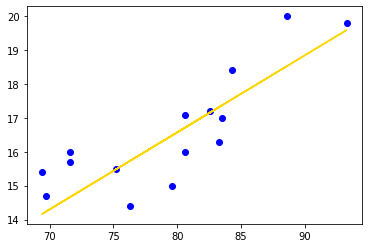

In [47]:
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='gold')
plt.show()

# ###**3. Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [48]:
y_predict = regressor.predict(X_test)
df_prediction = pd.DataFrame({'Actual':y_test,'Predicted': y_predict})
df_prediction

,Actual,Predicted
0,18.4,17.547771
1,17.0,17.366190
2,16.0,14.665183
3,16.0,16.707962
4,15.7,14.665183


In [62]:
from sklearn import metrics

In [52]:
metrics.r2_score(y_test,y_predict)

0.14484972722567024

**R2-Score is 0.14484972722567024**

##**4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [56]:
regressor.predict([[95]])

array([19.97640705])

## **5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [54]:

(18 - regressor.intercept_ ) / regressor.coef_

array([86.29241609])

**Particular morning the crickets were chirping at a rate of 18 chirps per second. The approximate ground temperature that morning is 86.29**

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [89]:
df = pd.read_fwf("brain_body.txt")

In [90]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [91]:
df.shape

(62, 2)

In [92]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [93]:
df.drop_duplicates()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [94]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


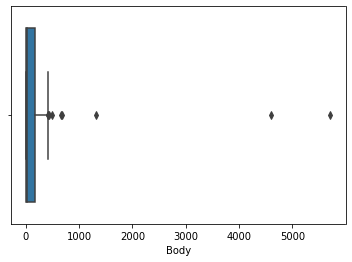

In [95]:
import seaborn as sns
sns.boxplot(df['Body'])

In [96]:
IQR = df['Body'].quantile(0.75) - df['Body'].quantile(0.25)
upper_threshold = df['Body'].quantile(0.75) + (1.5 * IQR)
lower_threshold = df['Body'].quantile(0.25) - (1.5 * IQR)
if upper_threshold > df['Body'].max():
  print("No outliers in upper threshold")
else:
  print("Outliers in upper threshold")
if lower_threshold < df['Body'].min():
  print("No outliers in lower threshold")
else:
  print("Outliers in lower threshold")

Outliers in upper threshold
No outliers in lower threshold


In [97]:
max_threshold = df['Body'].quantile(0.95)
min_threshold = df['Body'].quantile(0.05)

In [98]:
df = df[(df['Body']<max_threshold) & (df['Body']>min_threshold)]

In [99]:
df.shape

(54, 2)

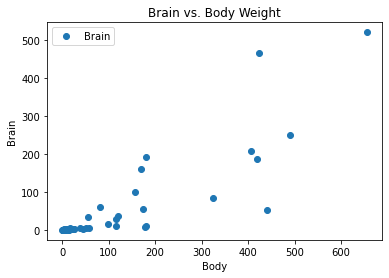

In [100]:
df.plot(x='Body',y='Brain',style='o')
plt.xlabel('Body')
plt.ylabel("Brain")
plt.title("Brain vs. Body Weight")
plt.show()

In [101]:
df.corr()

,Brain,Body
Brain,1.00000,0.85416
Body,0.85416,1.00000


In [102]:
X = df[['Body']].values
y = df['Brain'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)

### **1. Find the linear regression equation for this data for brain weight to body weight.**

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [104]:
print('Linear Regression Equation : y =  {:.3f} x + {:.3f}'. format(regressor.coef_[0],regressor.intercept_))

Linear Regression Equation : y =  0.729 x + -15.170


**Brain Weight = 0.729 Body Weight -15.170**

### **2. Chart the original data and the equation on the chart.**

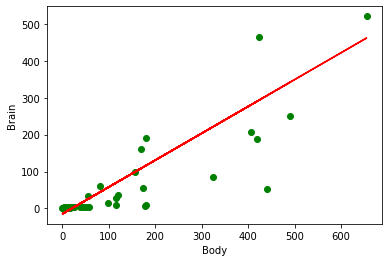

In [105]:
plt.scatter(X,y,color = "green")
plt.plot(X,regressor.predict(X),color ="red")
plt.xlabel('Body')
plt.ylabel("Brain")
plt.show()

## **3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [106]:
y_predict = regressor.predict(X_test)

In [108]:
from sklearn import metrics
print("R^2 Score: ",metrics.r2_score(y_test,y_predict))

R^2 Score:  0.04268224638395113


**R2 Score is 0.042688224638395113**

---



In [107]:
regressor.score(X_test,y_test)

0.04268224638395113

**Regression Score=0.04268224638395113**

---



# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [112]:
ds = pd.read_fwf("salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [113]:
print(ds.shape)
ds.head()

(52, 6)


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [114]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [115]:
ds.drop_duplicates()
ds.shape

(52, 6)

In [116]:
ds.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [117]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3 - Q1
((ds < (Q1 - 1.5 * IQR)) | (ds > (Q3 + 1.5 * IQR))).sum()

Sex       0
Rank      0
Year      1
Degree    0
YSdeg     0
Salary    0
dtype: int64

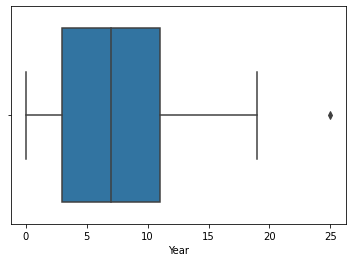

In [119]:
sns.boxplot(x = ds["Year"])
plt.show()

**1. Find the linear regression equation for this data using columns 1-5 to column 6.**

In [120]:
X =ds[['Sex','Rank','Year','Degree','YSdeg']].values
y = ds['Salary'].values


In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [123]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [124]:
print('Linear Regression Equation is : y = {:.3f} + {:.3f} x1 + {:.3f} x2 + {:.3f} x3 + {:.3f} x4 + {:.3f} x5 '.format(regressor.intercept_ , regressor.coef_[0],regressor.coef_[1],regressor.coef_[2],regressor.coef_[3],regressor.coef_[4]))


Linear Regression Equation is : y = 24678.306 + 969.421 x1 + 4948.608 x2 + 3048.819 x3 + -385.607 x4 + -1396.339 x5 


**Salary = 24678.30 + 969.42 Sex + 4948.60 Rank + 3048.81 Year - 385.60 Degree -1396.33**

##**2. Find the selection of columns with the best R2  score.**

In [125]:
y_predict = regressor.predict(X_test_scaled)

In [126]:
from sklearn import metrics
print("R^2 Score: ",metrics.r2_score(y_test,y_predict))

R^2 Score:  0.8066145306330654


**R2 Score is 0.042688224638395113**

---



---



In [127]:
def combinations(F):
  if F:
    result = combinations(F[:-1])
    return result + [i+[F[-1]] for i in result]
  else:
    return [[]]
comb = combinations (['Sex','Rank','Year','Degree','YSdeg'])
comb = comb[1:]
print(comb)

[['Sex'], ['Rank'], ['Sex', 'Rank'], ['Year'], ['Sex', 'Year'], ['Rank', 'Year'], ['Sex', 'Rank', 'Year'], ['Degree'], ['Sex', 'Degree'], ['Rank', 'Degree'], ['Sex', 'Rank', 'Degree'], ['Year', 'Degree'], ['Sex', 'Year', 'Degree'], ['Rank', 'Year', 'Degree'], ['Sex', 'Rank', 'Year', 'Degree'], ['YSdeg'], ['Sex', 'YSdeg'], ['Rank', 'YSdeg'], ['Sex', 'Rank', 'YSdeg'], ['Year', 'YSdeg'], ['Sex', 'Year', 'YSdeg'], ['Rank', 'Year', 'YSdeg'], ['Sex', 'Rank', 'Year', 'YSdeg'], ['Degree', 'YSdeg'], ['Sex', 'Degree', 'YSdeg'], ['Rank', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Degree', 'YSdeg'], ['Year', 'Degree', 'YSdeg'], ['Sex', 'Year', 'Degree', 'YSdeg'], ['Rank', 'Year', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]


In [141]:
# Converting  the all Columns to Row 

R2_Score = []
for i in comb:
    X = ds[i].values
    y = ds.loc[:,'Salary'].values
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=200)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test)
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train_scaled,y_train)
    y_predict = regressor.predict(X_test_scaled)
    from sklearn import metrics
    R2_Score.append(metrics.r2_score(y_test,y_predict))

In [143]:
ds_new = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
ds_new

,Feature Combination,R2 Score
0,[Sex],-0.175373
1,[Rank],0.789212
2,"[Sex, Rank]",0.791057
3,[Year],0.530712
4,"[Sex, Year]",0.300938
5,"[Rank, Year]",0.874225
6,"[Sex, Rank, Year]",0.800191
7,[Degree],-0.391957
8,"[Sex, Degree]",-0.207092
9,"[Rank, Degree]",0.795871


**Selection of columns with the best  R2 score is [Sex, Rank, Year, Degree, YSdeg] :0.806615**

## **3. Report whether sex is a factor in salary.**

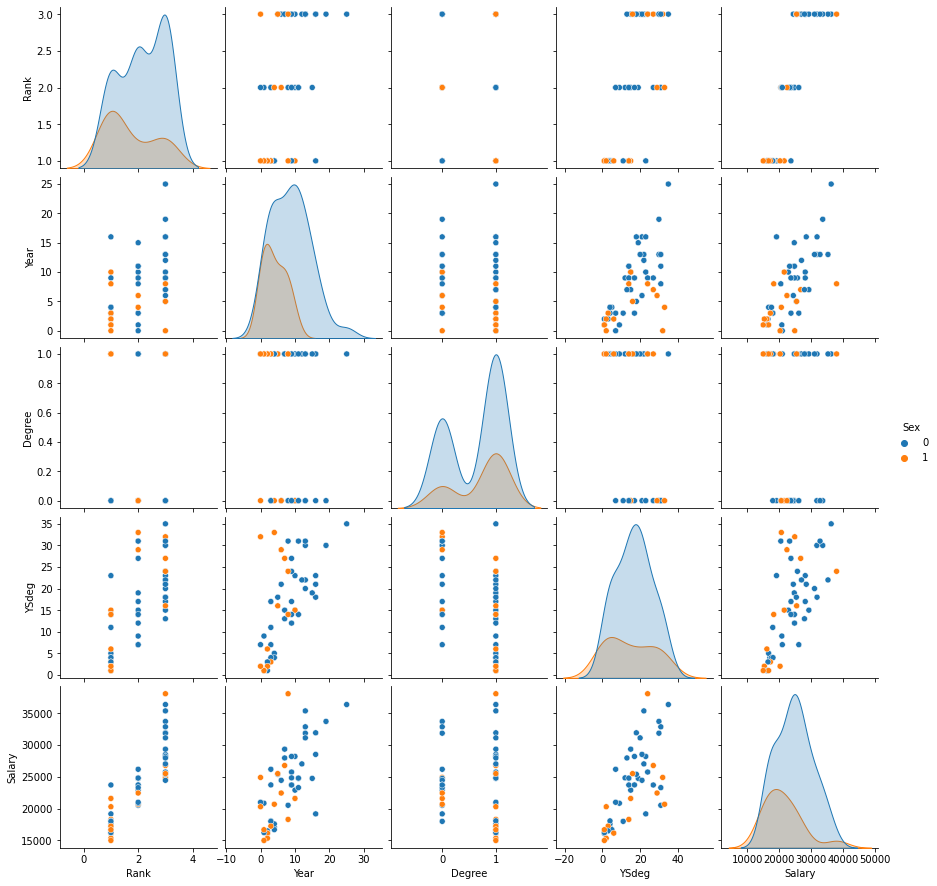

In [145]:
sns.pairplot(ds,hue="Sex")

In [146]:
coeff_ds = pd.DataFrame(regressor.coef_,['Sex','Rank','Year','Degree','YSdeg'],columns = ['Coefficient'])
coeff_ds

,Coefficient
Sex,969.421129
Rank,4948.608426
Year,3048.818685
Degree,-385.607149
YSdeg,-1396.339075


In [147]:
ds.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [148]:
ds[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [149]:
num_by_sex = ds.Sex.value_counts()
print('men: {}\nwomen: {}'.format(num_by_sex[0], num_by_sex[1]))

men: 38
women: 14


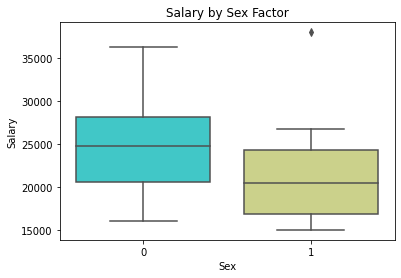

In [151]:
import seaborn as sns
sns.boxplot(data=ds, x="Sex", y="Salary",palette='rainbow')
plt.title('Salary by Sex Factor')
plt.show()

**From above observations of plots and low values of coefficient and R2 Score value of feature 'Sex', we can say conclude 'Sex' is not a factor in determining salary**